In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline

In [2]:
sns.set_theme(style="whitegrid")

In [3]:
df_train = pd.read_csv('Loan Eligible Dataset/loan-train.csv') # dataset which we will use for EDA and model train
df_test = pd.read_csv("Loan Eligible Dataset/loan-test.csv")  # this dataset does not have Loan_Status column but 
                                                              # can be used for testing the trained mode

### Problem Statement:
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

### Source
Dataset was downloaded from __[Kaggle](https://www.kaggle.com/vikasukani/loan-eligible-dataset)__ 

### Dataset Key Information.
Key Name - Description   
Loan_ID - Unique Loan ID   
Gender - Male/ Female   
Married - Applicant married (Y/N)   
Dependents - Number of dependents   
Education - Applicant Education (Graduate/ Under Graduate)   
Self_Employed - Self-employed (Y/N)   
ApplicantIncome - Applicant income  
CoapplicantIncome - Coapplicant income   
LoanAmount - Loan amount in thousands   
Loan_Amount_Term - Term of a loan in months   
Credit_History - credit history meets guidelines   
Property_Area - Urban/ Semi-Urban/ Rural   
Loan_Status - Loan approved (Y/N)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysys ( EDA )
Let's have a look at the dataset with a bit of EDA.



First, I wanted to see how many null values this dataset has and decide what to do with each.

In [6]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

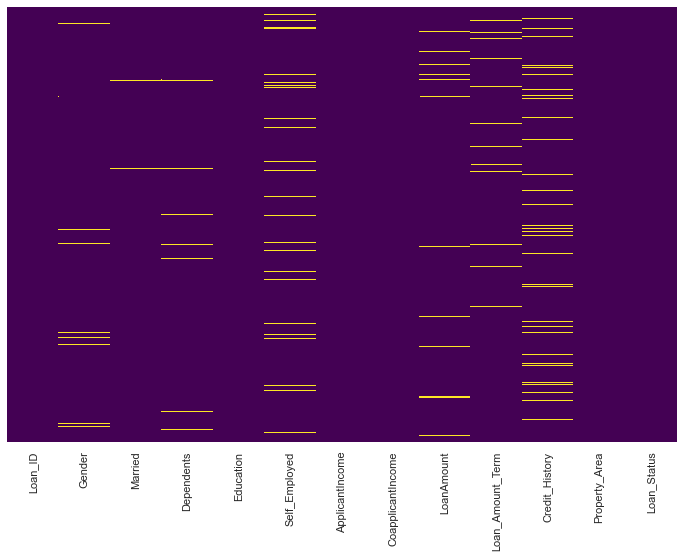

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

We can see that we have some data missing, and judging by the fact that our dataset has only 614 entries, we will try to input some replacements where possible.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

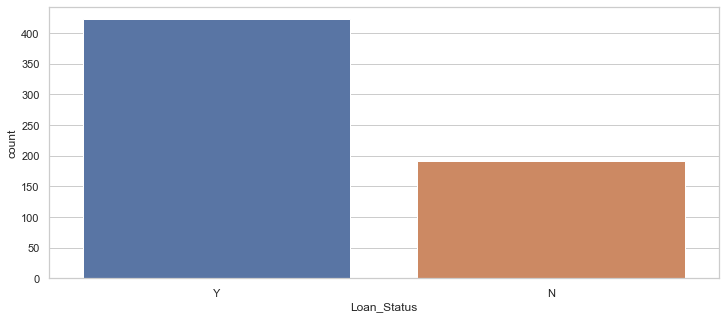

In [8]:
plt.figure(figsize=(12,5))
sns.countplot(x='Loan_Status', data=df_train)

From the countplot above we can see that we have more data on loans which were approved, roughly double in size.

Let's have a look at the distribution of Loan_Status based on LoanAmount.

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

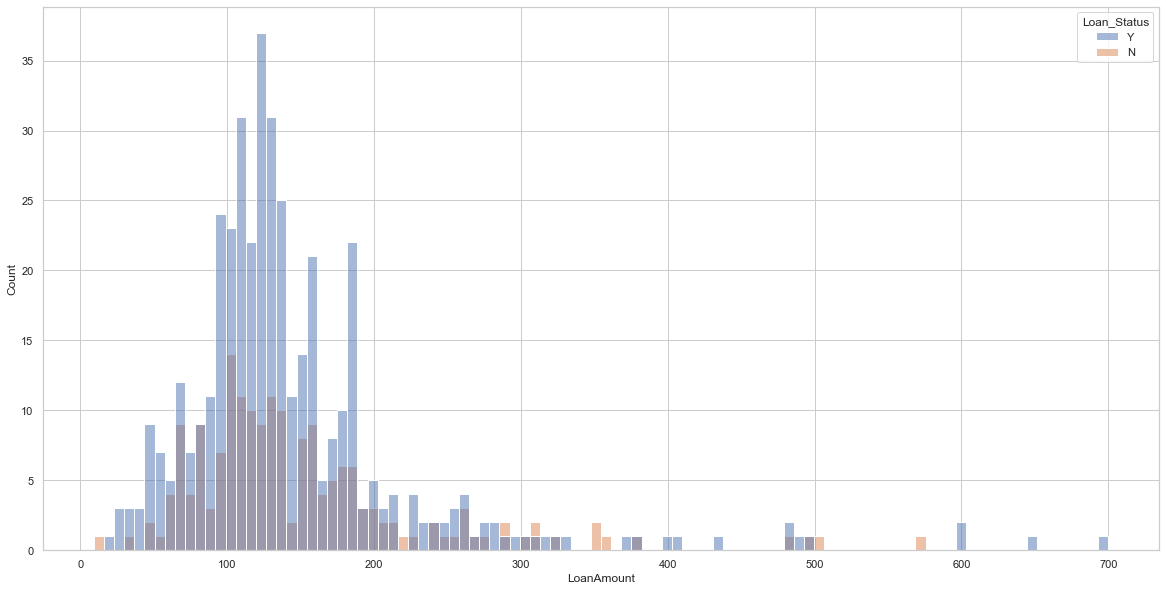

In [9]:
plt.figure(figsize=(20,10))
sns.histplot(x='LoanAmount', hue='Loan_Status',data=df_train, bins = 100)

We can see from the plot above that most of the loan amounts sit between 50 and 250, and we already knew that we have more data on the approved ones therefore the higher amounts of 'Yes' are expected. 

Let's have a look at the distribution on Gender and also the Loan_Status based on Gender.

<AxesSubplot:xlabel='Gender', ylabel='count'>

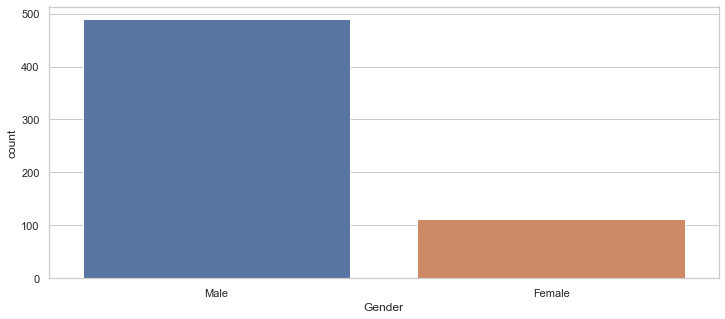

In [10]:
plt.figure(figsize=(12,5))
sns.countplot(x='Gender', data=df_train)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

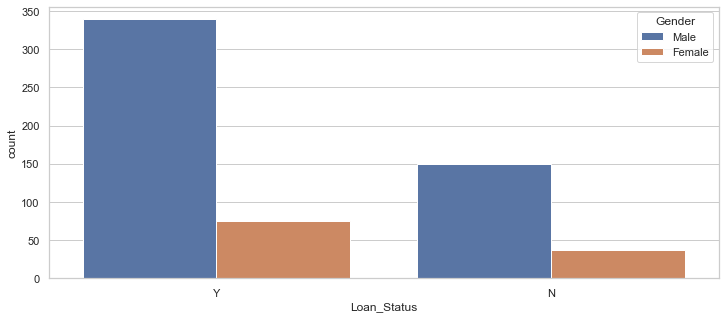

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(x='Loan_Status', hue='Gender',data=df_train)

We can see that most of the applicants are male which also affects the distribution of the Loan_Status.

What can we do is to check for each gender, and judging from the information below, there is no clear pattern. 

In [12]:
df_train[df_train['Gender']=='Male']['Loan_Status'].value_counts()

Y    339
N    150
Name: Loan_Status, dtype: int64

In [13]:
df_train[df_train['Gender']=='Female']['Loan_Status'].value_counts()

Y    75
N    37
Name: Loan_Status, dtype: int64

***
I like to take advantage of this very cool and handy library in my projects, as it will show a lot of details about our datasets. 

In [14]:
from pandas_profiling import ProfileReport

In [15]:
profile = ProfileReport(df_train, title="Pandas Profiling Report")

In [16]:
profile.to_notebook_iframe()

### Missing data & Converting Categorical Features

As mentioned at the beginning, we will have to deal with some missing data. We can see below a sum for each column.   
As our sample size is quite small, we will try to input some values for some of them.

In [17]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

I will start with the "Married" categorical column. As far as we see, we are missing 3 entries. I will drop this rows and there are only 3.

In [18]:
df_train.dropna(subset=['Married'], inplace=True)

In [19]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           12
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

I have decided to first drop the Loan ID cell as I will not use it in the model training, and create dummy variables for the following columns: "Married", "Gender", "Education" , "Self_Employed", "Property_Area", "Loan_Status".

In [20]:
married = pd.get_dummies(df_train['Married'], drop_first=True)
gender = pd.get_dummies(df_train['Gender'], drop_first=True)
education = pd.get_dummies(df_train['Education'], drop_first=True)
self_employed = pd.get_dummies(df_train['Self_Employed'], drop_first=True)
property_area = pd.get_dummies(df_train['Property_Area'], drop_first=True)
loan_status = pd.get_dummies(df_train['Loan_Status'], drop_first=True)

In [21]:
df_train.drop(['Loan_ID','Married', 'Gender', 'Education','Self_Employed',
               'Property_Area', 'Loan_Status' ], axis=1, inplace=True)

In [22]:
df_train = pd.concat([df_train, married, gender, education, self_employed, property_area, loan_status], axis=1)

In [23]:
df_train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Yes,Male,Not Graduate,Yes,Semiurban,Urban,Y
0,0,5849,0.0,NaN,360.0,1.0,0,1,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,0,1,0,0,0,1,1


In [24]:
df_train.rename(columns={"Y": "Loan_Status"}, inplace=True)

Now, we sorted all our categorical columns using dummy variables. We still have 4 columns where we are missing values as seen below. 

For "Dependents", I will assume that the missing values are equal to 0 so I will do this change. Also I noticed that we have some inputs with '3+' as value so I will just leave it as 3 as this will cause an error when training the model.

In [25]:
df_train.isnull().sum()

Dependents           12
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Yes                   0
Male                  0
Not Graduate          0
Yes                   0
Semiurban             0
Urban                 0
Loan_Status           0
dtype: int64

In [26]:
df_train['Dependents'] = df_train['Dependents'].fillna(0)

In [27]:
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
0      12
Name: Dependents, dtype: int64

In [28]:
c = lambda x: 3 if x == '3+' else x
df_train['Dependents'] = df_train['Dependents'].map(c)

In [29]:
df_train['Dependents'].value_counts()

0    345
1    102
2    101
3     51
0     12
Name: Dependents, dtype: int64

For 'LoanAmount' column, I saw a strong correlation with 'ApplicantIncome'but as the number of missing values are only 12, I have decided to replace with the mean value.

In [30]:
df_train["LoanAmount"].describe()

count    590.000000
mean     146.369492
std       85.729343
min        9.000000
25%      100.000000
50%      127.500000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

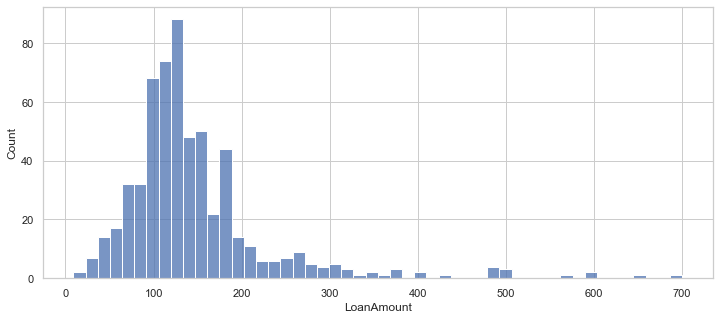

In [31]:
plt.figure(figsize=(12,5))
sns.histplot(x='LoanAmount', data=df_train, bins=50)

In [32]:
df_train['LoanAmount'] = df_train['LoanAmount'].fillna((df_train['LoanAmount'].mean()))

Now let's deal with the "Loan_Amount_Term" column. As we saw at the beginning, this is the 'Term of a loan in months'. We can see below that the most entries are with the value of 360 months, therefore I decided to fill the missing 14 cells with this value.

In [33]:
df_train['Loan_Amount_Term'].value_counts()

360.0    511
180.0     44
480.0     14
300.0     13
84.0       4
240.0      3
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

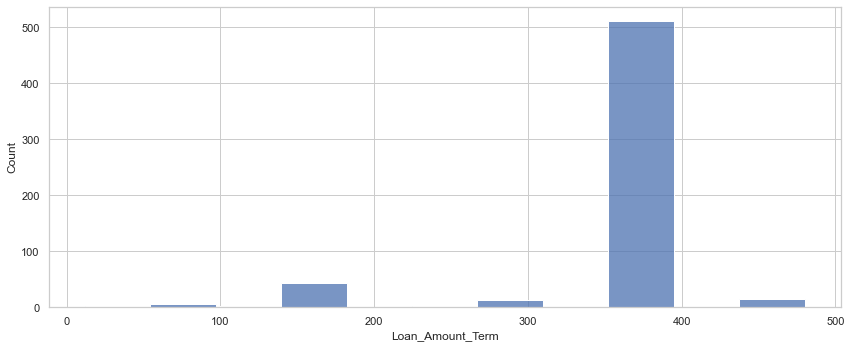

In [34]:
plt.figure(figsize=(12,5))
sns.histplot(x='Loan_Amount_Term', data=df_train)
plt.tight_layout()

In [35]:
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].fillna(360.0)

Now for the last one, we have to deal with the Credit History column. We are missing quite a big number (50) for our small dataset. As the definition for this column says '__Credit_History - credit history meets guidelines__'. 

I had a look at the correlation between variables ( please see above in the Pandas Profiling Report ) and I noticed that Credit History and Loan_Status are highly correlated, which is expected, therefore I decided to remove this column as it will affect our model.

In [36]:
df_train['Credit_History'].value_counts()

1.0    472
0.0     89
Name: Credit_History, dtype: int64

In [37]:
df_train[df_train['Credit_History'].isna()]

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Yes,Male,Not Graduate,Yes,Semiurban,Urban,Loan_Status
16,1,3596,0.0,100.000000,240.0,NaN,0,1,1,0,0,1,1
24,1,3717,2925.0,151.000000,360.0,NaN,1,1,0,0,1,0,0
30,1,4166,3369.0,201.000000,360.0,NaN,1,1,0,0,0,1,0
42,0,2400,0.0,75.000000,360.0,NaN,1,1,0,0,0,1,1
79,3,3333,2166.0,130.000000,360.0,NaN,1,1,1,1,1,0,1
83,0,6000,2250.0,265.000000,360.0,NaN,1,1,0,0,1,0,0
86,2,3333,2000.0,99.000000,360.0,NaN,1,1,1,0,1,0,1
95,0,6782,0.0,146.369492,360.0,NaN,0,1,0,0,0,1,0
117,1,2214,1398.0,85.000000,360.0,NaN,1,1,0,0,0,1,1
125,0,3692,0.0,93.000000,360.0,NaN,0,0,0,0,0,0,1


In [38]:
df_train.drop(['Credit_History'], axis=1, inplace=True)

Now, we fixed the missing values and we prepeared the features that we want to use. Let's train a model now.

<AxesSubplot:>

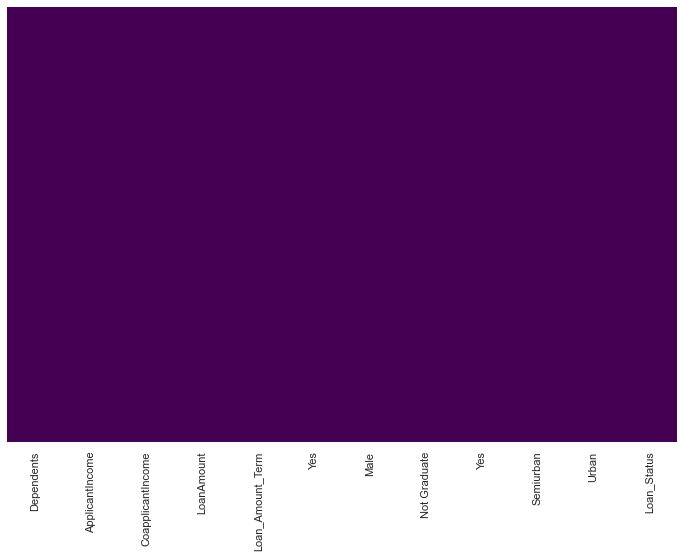

In [39]:
plt.figure(figsize=(12,8))
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

***
## Building a Logistic Regression model

Let's start with splitting our data into a training set and a test set.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
df_train.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Yes', 'Male', 'Not Graduate', 'Yes', 'Semiurban',
       'Urban', 'Loan_Status'],
      dtype='object')

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Loan_Status',axis=1), 
                                                    df_train['Loan_Status'], test_size=0.30, 
                                                    random_state=42)

Now let's train and predict.

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
logmodel = LogisticRegression()

In [80]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [81]:
predictions = logmodel.predict(X_test)

### Model Evaluation

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.20      0.02      0.03        54
           1       0.70      0.97      0.82       130

    accuracy                           0.69       184
   macro avg       0.45      0.49      0.42       184
weighted avg       0.56      0.69      0.59       184



In [84]:
print(confusion_matrix(y_test, predictions))

[[  1  53]
 [  4 126]]


Taking in consideration the size of the dataset, I am happy with this results but, let's try also with a Decision Tree Classifier model.

### Decision Trees

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dtree = DecisionTreeClassifier()

In [87]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [88]:
tree_pred = dtree.predict(X_test)

In [89]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.30      0.30      0.30        54
           1       0.71      0.71      0.71       130

    accuracy                           0.59       184
   macro avg       0.50      0.50      0.50       184
weighted avg       0.59      0.59      0.59       184



In [90]:
print(confusion_matrix(y_test, tree_pred))

[[16 38]
 [38 92]]


***
### Conclusions

Having a look at the classification report for the LogisticRegression model and the DecisionTreeClassifier we can see that the Log.R one did better on the 'Yes (1)' answer for the Loan_Status, and did quite bad for the 'No (9)' values. The DecisionTree model seems to have more balanced results but still not great accuracy. 

As the dataset is small, I will leave it here. Hope you enjoyed this small project. I liked it as I got the chance to mess around with preparing the data and dealing with missing values. 
Thank you for your time if you reached until here !